# 회귀 분석

### Python으로 미분식 구하는 방법

In [1]:
from sympy import symbols, Derivative

In [2]:
x = symbols('x') #함수에 사용될 변수를 심볼화
fx = 3 * x ** 2 - 4 * x + 1 #함수식
Derivative(fx, x).doit() #x에 대한 도함수 구하기

6*x - 4

In [3]:
d = Derivative(fx, x).doit() #미분식의 객체화
d.subs({x:2}) # x = 2일때의 미분계수

8

#### MSE 편미분하기

In [4]:
n, x, W, b, y = symbols('n, x, W, b, y') #함수에 사용될 변수를 심볼화
fx = (y - W * x - b) ** 2 / n #MSE 함수식
Derivative(fx, W).doit() #w에 대한 편미분식 구하기

-2*x*(-W*x - b + y)/n

In [5]:
Derivative(fx, b).doit()

(2*W*x + 2*b - 2*y)/n

In [6]:
del W, b, y, x, n #symbol을 변수로 사용하기 위해 지움
#함수식을 정의하기 위해 symbol로 정해진 name은 변수로 사용될 수 없기때문

##  경사하강법

### (1) 수치 미분법 

#### 중심 차분법

In [7]:
def numerical_derivative(func, x):
    delta = 1E-4 #소수 네번째자리가 1이되도록
    return (func(x + delta) - func(x - delta)) / (2 * delta)

In [8]:
def func1(x):
    return x**2
numerical_derivative(func1, 2.0) #x=2에서의 미분값

4.000000000004

In [9]:
for i in range(0, 11):
    print(i, ':', numerical_derivative(func1, float(i)))

0 : 0.0
1 : 1.9999999999992246
2 : 4.000000000004
3 : 6.000000000012662
4 : 7.999999999999119
5 : 9.999999999976694
6 : 11.999999999972033
7 : 13.999999999967372
8 : 15.999999999927184
9 : 17.99999999995805
10 : 19.99999999995339


#### 다중 변수 미분 계수 구하기
- https://numpy.org/doc/stable/reference/generated/numpy.nditer.html
- 입력 변수가 독립적이기 때문에, 수치 미분도 변수의 개수만큼 개별적으로 계산 (각각 수치 미분 수행)

In [10]:
#수치미분법에 의한 다중 변수 미분 계수 구하는 프로그램
import numpy as np

def numerical_derivative(f, x): #f:다변수 함수, x:모든 변수값을 포함하고 있는 numpy배열
    delta = 1E-4
    
    grad = np.zeros_like(x) # 각 변수마다, 계산된 수치 미분계수 값
    itr = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not itr.finished: #끝까지 갔는지 체크
        idx = itr.multi_index   # index
        
        tmp_val = x[idx]  #임시보관
        
        x[idx] = float(tmp_val + delta)
        fx1 = f(x) #f(x+delta, y) 계산
        
        x[idx] = float(tmp_val - delta)
        fx2 = f(x) #f(x-delta, y) 계산
        grad[idx] = (fx1 - fx2) / (2 * delta)
        
        x[idx] = tmp_val
        itr.iternext() 
    else:
        #print(grad)
        return grad

In [11]:
#수치미분법에 의한 선형 회귀 구현
def MSE(p):  #p: [W, b]를 가지는 numpy 배열
    global X, y
    y_pred = X * p[0] + p[1]
    return np.sum((y - y_pred) ** 2) / len(X)

In [12]:
#자료
X = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-2, -1, 0, 1, 2, 3, 4]) #y = 1*x + 1

In [13]:
#실제 프로그램
import random

W = float(random.randint(-10, 10))
b = float(random.randint(-10, 10))

#list 형태로 변환
W_history = [W]
b_history = [b]

cost = MSE(np.array([W, b])) #MSE 함수 사용 - numpy배열
print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost) #Epochs가 0일때 출력

rate = 0.01 #Learning rate  #데이터 개수가 작으면 rate가 커지고, 데이터 개수가 커지면 rate가 작아짐  #1보다 작은 값
MaxItrs = 1000 #최대 1000번 반복

for epoch in range(1, MaxItrs + 1):  #epoch: 반복 횟수 저장
    gradientW, gradientB = numerical_derivative(MSE, np.array([W, b]))
    #새로운 W, B 생성
    newW = W - rate * gradientW  #Grad descent
    newb = b - rate * gradientB  #Grad descent
    W_history.append(newW)
    b_history.append(newb)
    W, b = newW, newb #새로 바뀐값이 [W, b]로 다시 대입
    
    cost = MSE(np.array([W, b])) #바뀐 [W, b]를 사용하여 cost 다시 계산

    if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
        print('Epochs:', epoch, 
              'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
              end=' ')
        print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 

# gradient W/b가 양수이면 점점 값이 줄어듦 -> 1로 수렴
# gradient W/b가 음수이면 점점 값이 커짐-> 1로 수렴

Epochs: 0 	W: -9.0 	b: -2.0 	cost: 409.0
Epochs: 1 gradient W: -80.00, gradient b:-6.00,  W:-8.20, b:-1.94, cost: 347.20
Epochs: 2 gradient W: -73.60, gradient b:-5.88,  W:-7.46, b:-1.88, cost: 294.86
Epochs: 3 gradient W: -67.71, gradient b:-5.76,  W:-6.79, b:-1.82, cost: 250.51
Epochs: 4 gradient W: -62.30, gradient b:-5.65,  W:-6.16, b:-1.77, cost: 212.94
Epochs: 5 gradient W: -57.31, gradient b:-5.53,  W:-5.59, b:-1.71, cost: 181.11
Epochs: 6 gradient W: -52.73, gradient b:-5.42,  W:-5.06, b:-1.66, cost: 154.13
Epochs: 7 gradient W: -48.51, gradient b:-5.32,  W:-4.58, b:-1.60, cost: 131.26
Epochs: 8 gradient W: -44.63, gradient b:-5.21,  W:-4.13, b:-1.55, cost: 111.87
Epochs: 9 gradient W: -41.06, gradient b:-5.10,  W:-3.72, b:-1.50, cost: 95.43
Epochs: 100 gradient W: -0.02, gradient b:-0.81,  W:1.00, b:0.60, cost: 0.16
Epochs: 200 gradient W: -0.00, gradient b:-0.11,  W:1.00, b:0.95, cost: 0.00
Epochs: 300 gradient W: -0.00, gradient b:-0.01,  W:1.00, b:0.99, cost: 0.00
Epochs: 4

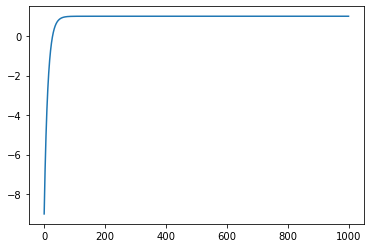

In [14]:
import matplotlib.pyplot as plt
plt.plot(W_history)
plt.show()

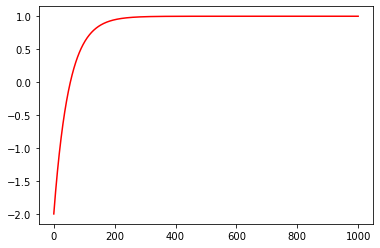

In [15]:
plt.plot(b_history, 'r')
plt.show()

### (2) 해석적 미분법

In [16]:
def MSE(W, b):
    global X, y
    y_pred = X * W + b
    return np.sum((y - y_pred) ** 2) / len(X)

def gradient(W, b):
    global X, y
    return np.sum(-2*X * (-W*X - b + y)) / len(X), np.sum(2*(W*X + b - y)) / len(X)

In [17]:
#자료
X = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-2, -1, 0, 1, 2, 3, 4]) #y = 1*x + 1

In [18]:
#실제 프로그램
import random

W = float(random.randint(-10, 10))
b = float(random.randint(-10, 10))

#list 형태로 변환
W_history = [W]
b_history = [b]

cost = MSE(W, b) #MSE 함수 사용 - numpy배열
print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost) #Epochs가 0일때 출력

rate = 0.01 #Learning rate  #데이터 개수가 작으면 rate가 커지고, 데이터 개수가 커지면 rate가 작아짐  #1보다 작은 값
MaxItrs = 1000 #최대 1000번 반복

for epoch in range(1, MaxItrs + 1):  #epoch: 반복 횟수 저장
    gradientW, gradientB = gradient(W, b)
    #새로운 W, B 생성
    newW = W - rate * gradientW  #Grad descent
    newb = b - rate * gradientB  #Grad descent
    W_history.append(newW)
    b_history.append(newb)
    W, b = newW, newb #새로 바뀐값이 [W, b]로 다시 대입
    
    cost = MSE(W, b) #바뀐 [W, b]를 사용하여 cost 다시 계산

    if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
        print('Epochs:', epoch, 
              'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
              end=' ')
        print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 

# gradient W/b가 양수이면 점점 값이 줄어듦 -> 1로 수렴
# gradient W/b가 음수이면 점점 값이 커짐-> 1로 수렴

Epochs: 0 	W: 10.0 	b: -5.0 	cost: 360.0
Epochs: 1 gradient W: 72.00, gradient b:-12.00,  W:9.28, b:-4.88, cost: 308.81
Epochs: 2 gradient W: 66.24, gradient b:-11.76,  W:8.62, b:-4.76, cost: 265.32
Epochs: 3 gradient W: 60.94, gradient b:-11.52,  W:8.01, b:-4.65, cost: 228.35
Epochs: 4 gradient W: 56.07, gradient b:-11.29,  W:7.45, b:-4.53, cost: 196.91
Epochs: 5 gradient W: 51.58, gradient b:-11.07,  W:6.93, b:-4.42, cost: 170.16
Epochs: 6 gradient W: 47.45, gradient b:-10.85,  W:6.46, b:-4.32, cost: 147.37
Epochs: 7 gradient W: 43.66, gradient b:-10.63,  W:6.02, b:-4.21, cost: 127.96
Epochs: 8 gradient W: 40.16, gradient b:-10.42,  W:5.62, b:-4.10, cost: 111.40
Epochs: 9 gradient W: 36.95, gradient b:-10.21,  W:5.25, b:-4.00, cost: 97.26
Epochs: 100 gradient W: 0.02, gradient b:-1.62,  W:1.00, b:0.20, cost: 0.63
Epochs: 200 gradient W: 0.00, gradient b:-0.22,  W:1.00, b:0.89, cost: 0.01
Epochs: 300 gradient W: 0.00, gradient b:-0.03,  W:1.00, b:0.99, cost: 0.00
Epochs: 400 gradient 

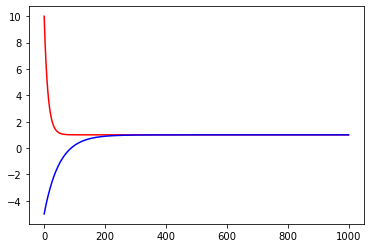

In [19]:
#W와 b값 변화 보기
iters = np.arange(MaxItrs + 1)
plt.plot(iters, W_history, 'r', b_history, 'b')
plt.show()

## 랜덤 자료에 대한 단순 선형 회귀 분석

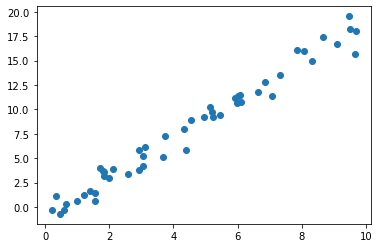

In [21]:
rng = np.random.RandomState(42)
X = 10 * rng.rand(50)
y = 2*X -1 + rng.randn(50)
plt.scatter(X, y)
plt.show() #상관계수 약0.9(선에 가까운 정도)

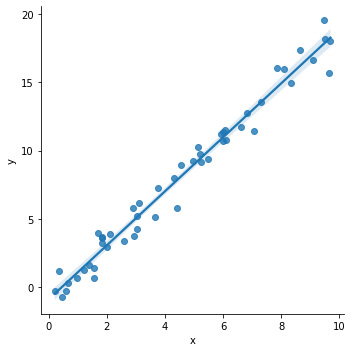

In [27]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame()
df['x'] = pd.Series(X)
df['y'] = pd.Series(y)
sns.lmplot(x = 'x', y = 'y', data = df)
plt.show()

### (1) 해석적 방법 

In [29]:
#단순 선형 회귀
Qx = X - X.mean()
Qy = y - y.mean()
W = sum(Qx * Qy) / sum(Qx ** 2)
print(W) #기울기

b = y.mean() - W * X.mean()
print(b) #y절편

1.9776566003853104
-0.9033107255311146


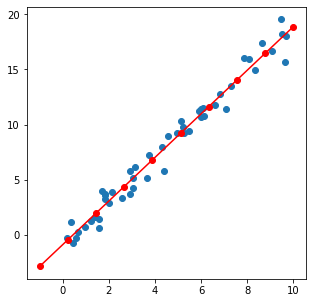

In [30]:
xx = np.linspace(-1, 10, 10) #x축의 값 / 시작점, 끝점, 데이터 개수 -> 등간격
yy = W * xx + b #직선의 방정식

plt.figure(figsize =(5, 5))
plt.scatter(X, y)
plt.plot(xx, yy, c = 'r', marker = 'o')
plt.show()

### (2) 수치미분 방법
- 해석적 방법에 비해 시간이 더 오래걸림

In [ ]:
#데이터 수가 많아지면 running rate값을 감소시켜야함 (0.001 or 0.0001부터 시작)
#데이터 수가 많아지면 MaxItrs도 증가시켜야함

### (3) Scikit Learn 활용
- 데이터를 특징과 대상 벡터로 배치
- 입력은 feature x값을 한 행씩으로 입력
- y는 1차원

In [31]:
X = X.reshape(-1, 1)
print(X.shape) #한 sample당 한 행
print(y.shape) #1차원

(50, 1)
(50,)


In [34]:
#Scikit-learn 클래스 import & 모델 인스턴스화, 학습
from sklearn.linear_model import LinearRegression #모델 클래스

model = LinearRegression(copy_X = True, 
                         fit_intercept = True, #fit_intercept(True) : y절편 있음
                         normalize = False) #원 값 그대로 사용
model.fit(X, y)

C:\Users\ictai\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [35]:
model.coef_ #기울기(W)

array([1.9776566])

In [36]:
model.intercept_ #b

-0.9033107255311164

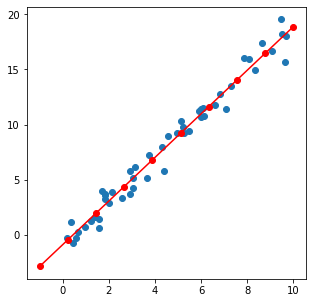

In [37]:
#학습된 모델로 새로운 데이터에 대한 레이블(값) 예측하기
xx = np.linspace(-1, 10, 10) #x축의 값 / 시작점, 끝점, 데이터 개수 -> 등간격
yy = model.predict(xx.reshape(-1, 1)) #1차원 xx값을 2차원으로 입력 -> y는 1차원

plt.figure(figsize =(5, 5))
plt.scatter(X, y)
plt.plot(xx, yy, c = 'r', marker = 'o')
plt.show()

## 다중 선형 회귀 분석
- 독립변수 x가 1개 이상인 회귀

#### Boston House 가격 예측

In [43]:
from sklearn.datasets import load_boston
house = load_boston()

dir(house)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [39]:
house.filename

'boston_house_prices.csv'

In [40]:
house.data.shape

(506, 13)

In [41]:
house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
house.target.shape

(506,)

In [46]:
df = pd.DataFrame(house.data, columns = house.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
df['MEDV'] = house.target #target name = MEDV(집값)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [50]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
#상관계수 분석
df.corr()['MEDV'] #MEDV열만 선택
#음수이면, 집값이 내려감 / 양수이면 집값이 올라감

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [52]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [54]:
#다중 회귀 자료 준비
X = df.copy()
y = X.pop('MEDV')
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [56]:
#모델 인스턴스화 및 학습
model = LinearRegression() #default 옵션으로 실행
model.fit(X, y)

LinearRegression()

In [57]:
print("기울기:", model.coef_)
print("y절편:", model.intercept_)

기울기: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
y절편: 36.45948838509015


In [58]:
#모델 예측 및 성능평가
pred = model.predict(X) #pred : 예측값

from sklearn.metrics import mean_squared_error
print('score=', model.score(X, y))
print("MSE=", mean_squared_error(df['MEDV'], pred)) #값이 낮을 수록 좋음
#단순 선형 회귀 결과 : 예측성이 높지 않음(Score값은 낮고 MSE값은 높음) -> 다중으로 여러 가지를 고려해야 함

score= 0.7406426641094095
MSE= 21.894831181729202


# Logistic Regression
- S자형 곡선
- 종속변수가 2개의 case(범주형)으로 표현되는 경우에 사용

## 1. Logistic 분류 프로그래밍

#### Cross entropy
- 출력결과 y는 0 혹은 1이므로 MSE와 다른 손실 함수 필요
- sigmoid(z)는 확률
- 잘 맞출수록 낮은 값

In [59]:
def sigmoid(z):
    return np.exp(z) / (1.0 + np.exp(z))

In [60]:
#수치미분법에 의한 다중 변수 미분 계수 구하는 프로그램
def numerical_derivative(f, x): #f:다변수 함수, x:모든 변수값을 포함하고 있는 numpy배열
    delta = 1E-4
    
    grad = np.zeros_like(x) # 각 변수마다, 계산된 수치 미분계수 값
    itr = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not itr.finished: #끝까지 갔는지 체크
        idx = itr.multi_index   # index
        
        tmp_val = x[idx]  #임시보관
        
        x[idx] = float(tmp_val + delta)
        fx1 = f(x) #f(x+delta, y) 계산
        
        x[idx] = float(tmp_val - delta)
        fx2 = f(x) #f(x-delta, y) 계산
        grad[idx] = (fx1 - fx2) / (2 * delta)
        
        x[idx] = tmp_val
        itr.iternext() 
    else:
        #print(grad)
        return grad

In [62]:
def cross_entropy(p): #p: [W, b]를 가지는 numpy 배열
    global X, y #y : target, y_p: predicted
    z = X * p[0] + p[1] #직선 생성
    y_p = sigmoid(z) #s자형 곡선으로 변형
    return (-1) * np.sum((y * np.log(y_p)) + ((1 - y) * np.log(1 - y_p)))   

In [63]:
X=np.array([10., 9., 3., 2., 1.])
y=np.array([1.,  1., 0., 0., 0.])

In [67]:
W = float(random.randint(-10, 10))
b = float(random.randint(-10, 10))

#list 형태로 변환
W_history = [W]
b_history = [b]

cost = cross_entropy(np.array([W, b])) #MSE 함수 사용 - numpy배열
print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost) #Epochs가 0일때 출력

rate = 0.1 #Learning rate  #데이터 개수가 작으면 rate가 커지고, 데이터 개수가 커지면 rate가 작아짐  #1보다 작은 값
MaxItrs = 20000 #최대 1000번 반복

for epoch in range(1, MaxItrs + 1):  #epoch: 반복 횟수 저장
    gradientW, gradientB = numerical_derivative(cross_entropy, np.array([W, b]))
    #새로운 W, B 생성
    newW = W - rate * gradientW  #Grad descent
    newb = b - rate * gradientB  #Grad descent
    W_history.append(newW)
    b_history.append(newb)
    W, b = newW, newb #새로 바뀐값이 [W, b]로 다시 대입
    
    cost = cross_entropy(np.array([W, b])) #바뀐 [W, b]를 사용하여 cost 다시 계산

    if len(str(epoch))==1 or epoch %4000==0 or epoch==MaxItrs:
        print('Epochs:', epoch, 
              'gradient W: %.2f, gradient b:%.2f, ' % (gradientW, gradientB), 
              end=' ')
        print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 

# gradient W/b가 양수이면 점점 값이 줄어듦
# gradient W/b가 음수이면 점점 값이 커짐

Epochs: 0 	W: -9.0 	b: -9.0 	cost: 189.00000001523185
Epochs: 1 gradient W: -19.00, gradient b:-2.00,  W:-7.10, b:-8.80, cost: 152.50
Epochs: 2 gradient W: -19.00, gradient b:-2.00,  W:-5.20, b:-8.60, cost: 116.00
Epochs: 3 gradient W: -19.00, gradient b:-2.00,  W:-3.30, b:-8.40, cost: 79.50
Epochs: 4 gradient W: -19.00, gradient b:-2.00,  W:-1.40, b:-8.20, cost: 43.00
Epochs: 5 gradient W: -19.00, gradient b:-2.00,  W:0.50, b:-8.00, cost: 6.58
Epochs: 6 gradient W: -18.26, gradient b:-1.92,  W:2.33, b:-7.81, cost: 0.41
Epochs: 7 gradient W: 1.00, gradient b:0.35,  W:2.23, b:-7.84, cost: 0.31
Epochs: 8 gradient W: 0.78, gradient b:0.27,  W:2.15, b:-7.87, cost: 0.25
Epochs: 9 gradient W: 0.64, gradient b:0.22,  W:2.08, b:-7.89, cost: 0.20
Epochs: 4000 gradient W: -0.00, gradient b:0.00,  W:1.96, b:-11.20, cost: 0.01
Epochs: 8000 gradient W: -0.00, gradient b:0.00,  W:2.15, b:-12.32, cost: 0.00
Epochs: 12000 gradient W: -0.00, gradient b:0.00,  W:2.26, b:-13.02, cost: 0.00
Epochs: 16000 

In [68]:
def predict(x):
    global W,b
    z = W *x + b
    y_p = sigmoid(z)
    if y_p > 0.5:
        return 1, y_p
    else:
        return 0, (1 - y_p)

In [69]:
for i in range(1, 11): #연습시간 1~10시간
    print(i, ":", predict(float(i))) #6시간 이상부터 통과

1 : (0, 0.9999900629120323)
2 : (0, 0.9998889879549165)
3 : (0, 0.998761104125725)
4 : (0, 0.9863305655867001)
5 : (0, 0.8659208846104862)
6 : (1, 0.6336951902353515)
7 : (1, 0.9508073872438598)
8 : (1, 0.9953905829674957)
9 : (1, 0.9995856974178792)
10 : (1, 0.9999629040388678)


In [70]:
print(W, b)

2.41346577400673 -13.932692378079937


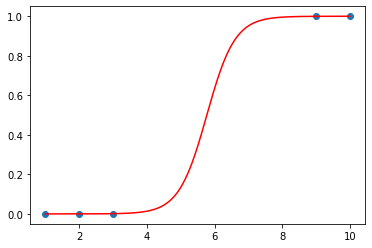

In [71]:
#회귀선 그리기
x_val = np.linspace(1, 10, 1000)
z = W * x_val + b
y_p = sigmoid(z)

plt.scatter(X, y)
plt.plot(x_val, y_p, 'r')
plt.show()

## 2. iris 종 분류 사례

In [72]:
from sklearn.datasets import load_iris

In [73]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = pd.Series(iris.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [76]:
sdf = pd.DataFrame()
sdf['petal_length'] = df['petal length (cm)']
sdf['species'] = df['species']
sdf = sdf[:100]

In [74]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   species       150 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.9 KB


In [75]:
sdf.describe()

,petal_length,species
count,150.000000,150.000000
mean,3.758000,1.000000
std,1.765298,0.819232
min,1.000000,0.000000
25%,1.600000,0.000000
50%,4.350000,1.000000
75%,5.100000,2.000000
max,6.900000,2.000000


### 3. 데이터로 regression 모델의 그래프 그려보기

C:\Users\ictai\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


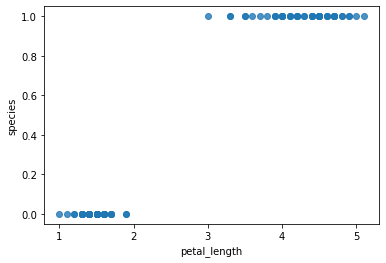

In [78]:
sns.regplot(x = 'petal_length', y = 'species', data = sdf, logistic = True)
plt.show()

### 4. 학습 데이터와 테스트 데이터 나누기

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sdf.iloc[:, :1], #2차원 slicing
                                                    sdf.iloc[:, 1],  #1차원 slicing
                                                    test_size = 0.33) #training이 67%
X_train.shape, y_train.shape

((67, 1), (67,))

### 5. 모듈 import, 모델 인스턴스화, 학습

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.coef_, model.intercept_) #2차원, 1차원 결과

[[2.63330996]] [-7.15747061]


### 회귀선 그리기

In [84]:
X = np.linspace(1, sdf['petal_length'].max(), 1000)
z = model.coef_[0][0] * X + model.intercept_[0]
Y = sigmoid(z)

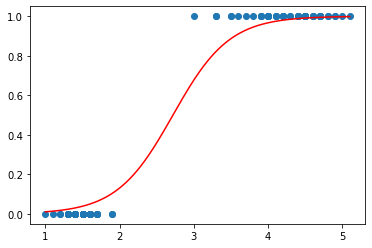

In [85]:
plt.scatter(sdf['petal_length'], sdf['species'])
plt.plot(X, Y, 'r')
plt.show()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

#학습된 데이터(training set)에 대한 성능 평가하기
print(confusion_matrix(y_train, model.predict(X_train))) #정답, 예측값 순서로 입력

[[33  0]
 [ 0 34]]


In [88]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True ) #heatmap
    plt.xlabel('Predicted') #예측값
    plt.ylabel('Ground truth') #실제값, 정답
    plt.show()

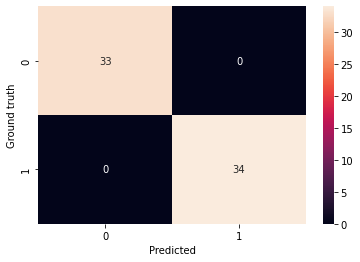

In [89]:
dispConfusionMatrix(y_train, model.predict(X_train))

In [91]:
print(classification_report(y_train, model.predict(X_train))) #정답, 예측값 순서로 입력

#accuracy : 정답 맞춘 확률
#f1-score : (precision과 recall의) 조화평균

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [92]:
#test set에 대해 성능 평가 하기
print(confusion_matrix(y_test, model.predict(X_test)))

[[17  0]
 [ 0 16]]


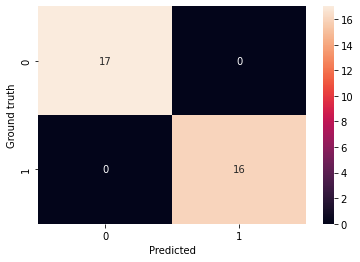

In [93]:
dispConfusionMatrix(y_test, model.predict(X_test))

In [94]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## ----   (1)  (0)
## (1) TN FP
## (0) FN TP